# Perzeptoren


In [2]:
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (7, 4)

### Aufgabe 4.1 Perzeptronklassifikator

Angenommen Sie haben den Perzeptronklassifikator 

$$ f(x) : \mathbb{R}^2 \rightarrow \{0, 1\} $$

mit den Parametern $ w_0 = 2 $, $ w_1 = -0.4 $ und $ w_2 = 0.5 $ trainiert.

1. **Welches geometrische Objekt ist die Entscheidungsoberfläche?**

2. **Zeichnen Sie die Entscheidungsoberfläche und markieren Sie den Halbraum, welcher positiv klassifiziert wird $ f(x) = 1 $ mit einem Pluszeichen + und den negativen Halbraum $ f(x) = 0 $ mit einem Minuszeichen –.**

3. **Was müssten Sie an $f(x)$ ändern, um eine entgegengesetzte Klassifikation zu erhalten, also Klasse 0 bei Daten der aktuellen Klasse 1 und umgekehrt?**

4. **Berechnen Sie die Gewichte des Perzeptronklassifikators, wenn Sie wissen, dass die Punkte $(3,0)^T$ und $(0,3)^T$ auf der Entscheidungsoberfläche liegen und dass der Ursprung $(0,0)^T$ negativ klassifiziert wird. Sie können einen beliebigen Wert für $ w_0 $ bestimmen solange die anderen Eigenschaften erfüllt sind.**

---

### Lösungsansatz

#### 1. Geometrisches Objekt der Entscheidungsoberfläche

Die Entscheidungsoberfläche eines Perzeptronklassifikators ist eine lineare Entscheidungsgrenze. In diesem Fall handelt es sich um eine Linie in ${R}^2$.



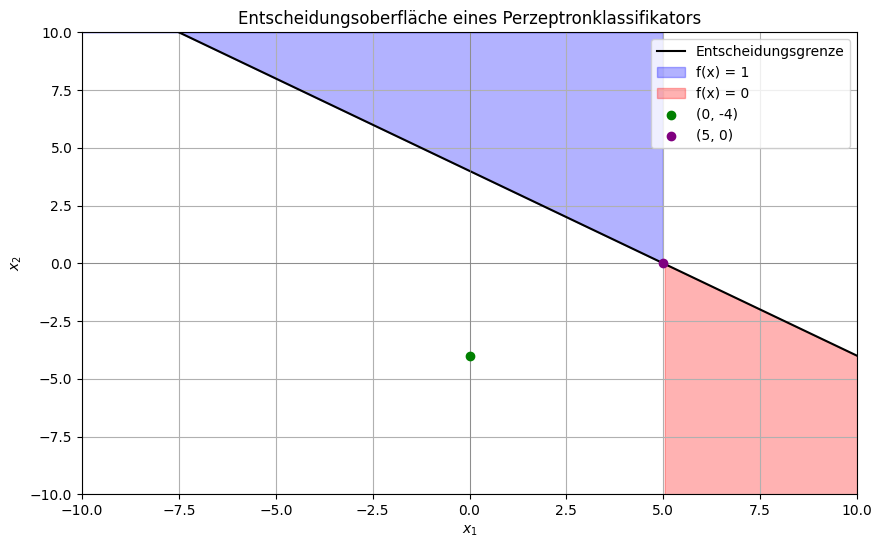

In [3]:


# Parameter für den Perzeptronklassifikator
w0, w1, w2 = 2, -0.4, 0.5

# Funktion, die die Entscheidungsgrenze definiert
def decision_boundary(x1):
    return (2 - 0.4 * x1) / 0.5

# Erzeuge die x-Werte für die Entscheidungsgrenze
x_values = np.linspace(-10, 10, 400)
y_values = decision_boundary(x_values)

# Punkte für die Halbräume
positive_halfspace = x_values[y_values >= 0]
negative_halfspace = x_values[y_values < 0]

# Erzeuge die y-Werte für die Halbräume
positive_y_values = y_values[y_values >= 0]
negative_y_values = y_values[y_values < 0]

plt.figure(figsize=(10, 6))

# Zeichne die Entscheidungsgrenze
plt.plot(x_values, y_values, label="Entscheidungsgrenze", color="black")

# Markiere die Halbräume
plt.fill_between(positive_halfspace, positive_y_values, y2=10, alpha=0.3, color="blue", label="f(x) = 1")
plt.fill_between(negative_halfspace, negative_y_values, y2=-10, alpha=0.3, color="red", label="f(x) = 0")

# Markiere wichtige Punkte
plt.scatter(0, -4, color="green", label="(0, -4)", zorder=5)
plt.scatter(5, 0, color="purple", label="(5, 0)", zorder=5)

# Beschriftungen und Legende
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Entscheidungsoberfläche eines Perzeptronklassifikators")
plt.legend()
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

plt.show()

#### 2. Zeichnen der Entscheidungsoberfläche und Markieren der Halbräume

Die Aufgabe besteht darin, die Entscheidungsoberfläche des gegebenen Perzeptronklassifikators zu zeichnen und die Bereiche, die positiv (mit $f(x) = 1$) und negativ (mit $f(x) = 0$) klassifiziert werden, zu markieren.

#### Gegebene Parameter:
- $w_0 = 2$
- $w_1 = -0.4$
- $w_2 = 0.5$

#### Entscheidungsoberfläche bestimmen:
Die Entscheidungsoberfläche (Entscheidungsgrenze) ist eine Linie, die durch die Gleichung definiert ist:

$$ 2 - 0.4 x_1 + 0.5 x_2 = 0 $$

#### Schritte zur Lösung:

1. **Bestimmen der Entscheidungsoberfläche:**
   - Diese Gleichung kann umgeformt werden, um $x_2$ in Abhängigkeit von $x_1$ zu finden:
     $$ x_2 = \frac{2 - 0.4 x_1}{0.5} $$
   - Dies ist die Gleichung der Linie, die die Entscheidungsoberfläche darstellt.

2. **Zeichnen der Linie:**
   - Wir verwenden Matplotlib, um diese Linie zu zeichnen.
   - Wir erzeugen eine Serie von $x_1$-Werten (z.B. von -10 bis 10) und berechnen die entsprechenden $x_2$-Werte, um die Linie zu zeichnen.

3. **Markieren der Halbräume:**
   - Der Bereich oberhalb der Linie (wo $f(x) = 1$) wird mit Pluszeichen (+) markiert.
   - Der Bereich unterhalb der Linie (wo $f(x) = 0$) wird mit Minuszeichen (-) markiert.
   - Diese Markierungen werden ebenfalls mit Matplotlib erstellt, wobei wir die Plus- und Minuszeichen entlang der $x_1$-Werte platzieren.

#### Visualisierung mit Matplotlib:
Wir verwenden die Bibliothek Matplotlib, um die Entscheidungsoberfläche zu visualisieren. Hier sind die wesentlichen Schritte und Funktionen, die verwendet werden:

- `np.linspace`: Erzeugt gleichmäßig verteilte Werte in einem bestimmten Bereich.
- `plt.plot`: Zeichnet die Entscheidungsoberfläche.
- `plt.fill_between`: Färbt die Halbräume ein, um die Klassifikationen zu verdeutlichen.
- `plt.text`: Fügt Plus- und Minuszeichen in die entsprechenden Bereiche ein.
- `plt.scatter`: Markiert spezifische Punkte, wenn nötig.
- `plt.axhline` und `plt.axvline`: Fügen graue Linien bei $x=0$ und $y=0$ ein, um die Achsen hervorzuheben.
- `plt.legend`, `plt.xlabel`, `plt.ylabel`, `plt.title`: Fügt Legenden, Beschriftungen und Titel hinzu.

Diese Funktionen zusammen ermöglichen es, die Entscheidungsoberfläche klar und deutlich darzustellen und die verschiedenen Klassifikationsbereiche zu visualisieren.

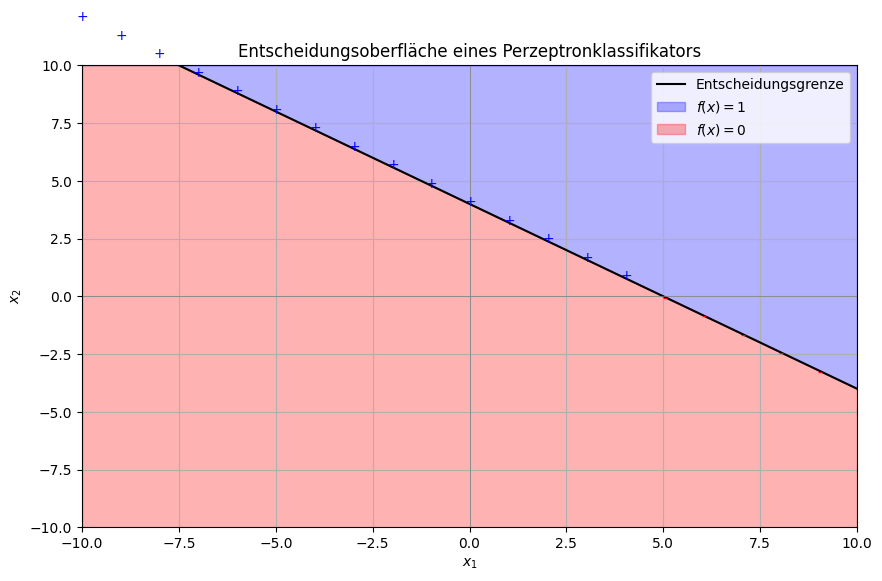

In [4]:


# Parameter für den Perzeptronklassifikator
w0, w1, w2 = 2, -0.4, 0.5

# Funktion, die die Entscheidungsgrenze definiert
def decision_boundary(x1):
    return (2 - 0.4 * x1) / 0.5

# Erzeuge die x-Werte für die Entscheidungsgrenze
x_values = np.linspace(-10, 10, 400)
y_values = decision_boundary(x_values)

plt.figure(figsize=(10, 6))

# Zeichne die Entscheidungsgrenze
plt.plot(x_values, y_values, label="Entscheidungsgrenze", color="black")

# Markiere die Halbräume mit Plus- und Minuszeichen
plt.fill_between(x_values, y_values, y2=10, alpha=0.3, color="blue", label="$f(x) = 1$")
plt.fill_between(x_values, y_values, y2=-10, alpha=0.3, color="red", label="$f(x) = 0$")

# Setze Plus- und Minuszeichen
for i in range(0, len(x_values), 20):
    if y_values[i] >= 0:
        plt.text(x_values[i], y_values[i] + 0.1, '+', ha='center', va='center', color='blue')
    else:
        plt.text(x_values[i], y_values[i] - 0.1, '-', ha='center', va='center', color='red')

# Beschriftungen und Legende
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Entscheidungsoberfläche eines Perzeptronklassifikators")
plt.legend()
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

plt.show()


#### 3. Ändern der Klassifikation

Die Aufgabe besteht darin, den Perzeptronklassifikator so zu modifizieren, dass die Klassifikation umgekehrt wird. Das bedeutet, dass Daten, die derzeit der Klasse 1 zugeordnet werden, der Klasse 0 zugeordnet werden und umgekehrt.

#### Gegebene Parameter:
- $w_0 = 2$
- $w_1 = -0.4$
- $w_2 = 0.5$

#### Schritte zur Lösung:

1. **Aktuelle Entscheidungsoberfläche:**
   Die Entscheidungsoberfläche ist durch die Gleichung gegeben:
   $$ 2 - 0.4 x_1 + 0.5 x_2 = 0 $$

2. **Ändern der Klassifikation:**
   Um die Klassifikation umzudrehen, ändern wir die Vorzeichen der Gewichte. Dadurch ändert sich die Entscheidungsfunktion zu:
   $$ f'(x) = -w_0 - w_1 x_1 - w_2 x_2 $$
   Das bedeutet:
   $$ f'(x) = -2 + 0.4 x_1 - 0.5 x_2 = 0 $$

3. **Neue Entscheidungsoberfläche:**
   Die neue Entscheidungsoberfläche wird durch die Gleichung:
   $$ -2 + 0.4 x_1 - 0.5 x_2 = 0 $$
   bestimmt. Umformen in die Form $x_2$ in Abhängigkeit von $x_1$ ergibt:
$$ x_2 = \frac{0.4 x_1 - 2}{0.5} $$
   
4. **Visualisierung der neuen Entscheidungsoberfläche:**
   Wir verwenden Matplotlib, um die neue Entscheidungsoberfläche zu zeichnen und die Bereiche, die jetzt positiv ($f'(x) = 1$) und negativ ($f'(x) = 0$) klassifiziert werden, zu markieren.



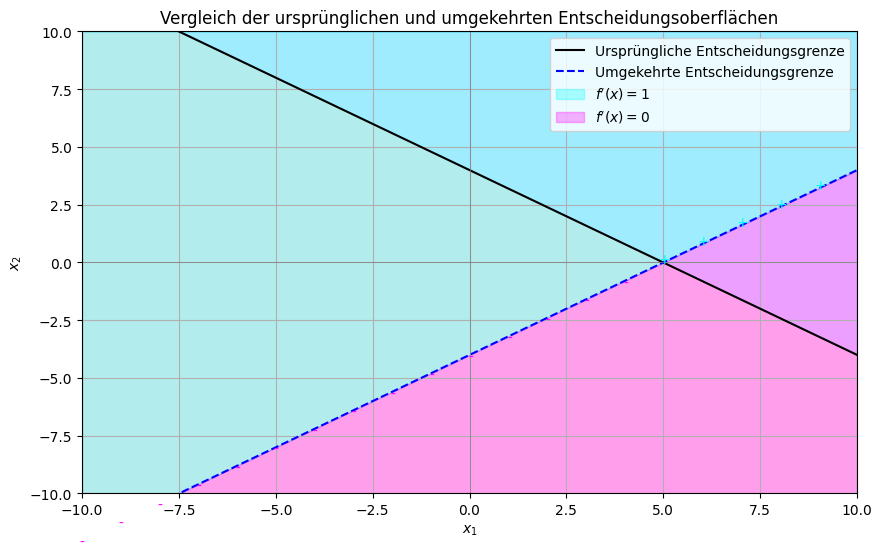

In [5]:


# Parameter für den Perzeptronklassifikator
w0, w1, w2 = 2, -0.4, 0.5

# Funktion, die die ursprüngliche Entscheidungsgrenze definiert
def decision_boundary_original(x1):
    return (2 - 0.4 * x1) / 0.5

# Funktion, die die umgekehrte Entscheidungsgrenze definiert
def decision_boundary_flipped(x1):
    return (0.4 * x1 - 2) / 0.5

# Erzeuge die x-Werte für die Entscheidungsgrenzen
x_values = np.linspace(-10, 10, 400)
y_values_original = decision_boundary_original(x_values)
y_values_flipped = decision_boundary_flipped(x_values)

plt.figure(figsize=(10, 6))

# Zeichne die ursprüngliche Entscheidungsgrenze
plt.plot(x_values, y_values_original, label="Ursprüngliche Entscheidungsgrenze", color="black")

# Zeichne die umgekehrte Entscheidungsgrenze
plt.plot(x_values, y_values_flipped, label="Umgekehrte Entscheidungsgrenze", color="blue", linestyle="--")

# Markiere die Halbräume für die ursprüngliche Entscheidungsgrenze
plt.fill_between(x_values, y_values_original, y2=10, alpha=0.1, color="blue")
plt.fill_between(x_values, y_values_original, y2=-10, alpha=0.1, color="red")

# Markiere die Halbräume für die umgekehrte Entscheidungsgrenze
plt.fill_between(x_values, y_values_flipped, y2=10, alpha=0.3, color="cyan", label="$f'(x) = 1$")
plt.fill_between(x_values, y_values_flipped, y2=-10, alpha=0.3, color="magenta", label="$f'(x) = 0$")

# Setze Plus- und Minuszeichen für die umgekehrte Entscheidungsgrenze
for i in range(0, len(x_values), 20):
    if y_values_flipped[i] >= 0:
        plt.text(x_values[i], y_values_flipped[i] + 0.1, '+', ha='center', va='center', color='cyan')
    else:
        plt.text(x_values[i], y_values_flipped[i] - 0.1, '-', ha='center', va='center', color='magenta')

# Beschriftungen und Legende
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Vergleich der ursprünglichen und umgekehrten Entscheidungsoberflächen")
plt.legend()
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

plt.show()

### 4. Gewichte eines Perzeptronklassifikators

#### Berechnung der Gewichte eines Perzeptronklassifikators

Die Aufgabe besteht darin, die Gewichte eines Perzeptronklassifikators zu berechnen, wenn folgende Bedingungen erfüllt sind:
- Die Punkte $(3,0)^T$ und $(0,3)^T$ liegen auf der Entscheidungsoberfläche.
- Der Ursprung $(0,0)^T$ wird negativ klassifiziert.

#### Schritte zur Lösung:

1. **Gegebene Bedingungen:**
   - Punkte auf der Entscheidungsoberfläche: $(3,0)$ und $(0,3)$
   - Ursprung negativ klassifiziert: $f(0,0) = 0$

2. **Allgemeine Form der Entscheidungsoberfläche:**
   Die Entscheidungsoberfläche wird durch die Gleichung definiert:
   $$ w_0 + w_1 x_1 + w_2 x_2 = 0 $$

3. **Einsetzen der Punkte in die Entscheidungsoberfläche:**
   - Für den Punkt $(3,0)$: $x_1=3$, $x_2=0$
     $$ w_0 + 3w_1 = 0 $$
   - Für den Punkt $(0,3)$: $x_1=0$, $x_2=3$
     $$ w_0 + 3w_2 = 0 $$

4. **Lösen der Gleichungen:**
   Da beide Gleichungen $w_0$ enthalten, können wir die Gleichungen kombinieren, um die Gewichte $w_1$ und $w_2$ zu bestimmen. Setzen wir $w_0$ gleich einem beliebigen Wert, z.B. $w_0 = -3$, dann erhalten wir:

   - Für $(3,0)^T$:
     $$ -3 + 3w_1 = 0 \implies w_1 = 1 $$
   - Für $(0,3)^T$:
     $$ -3 + 3w_2 = 0 \implies w_2 = 1 $$

5. **Überprüfung der Bedingungen:**
   - Entscheidungsoberfläche mit den gefundenen Gewichten:
     $$ -3 + x_1 + x_2 = 0 $$
   - Der Ursprung $(0,0)$ wird negativ klassifiziert:
     $$ -3 + 0 + 0 < 0 \implies f(0,0) = 0 $$

#### Ergebnisse:
Die Gewichte des Perzeptronklassifikators, die die gegebenen Bedingungen erfüllen, sind:
- $w_0 = -3$
- $w_1 = 1$
- $w_2 = 1$

#### Visualisierung der neuen Entscheidungsoberfläche:
Hier ist der Code, um die Entscheidungsoberfläche mit den berechneten Gewichten zu visualisieren:


Dieser Code visualisiert die neue Entscheidungsoberfläche mit den berechneten Gewichten und markiert die relevanten Punkte $(3,0)$, $(0,3)$ und den Ursprung $(0,0)$.

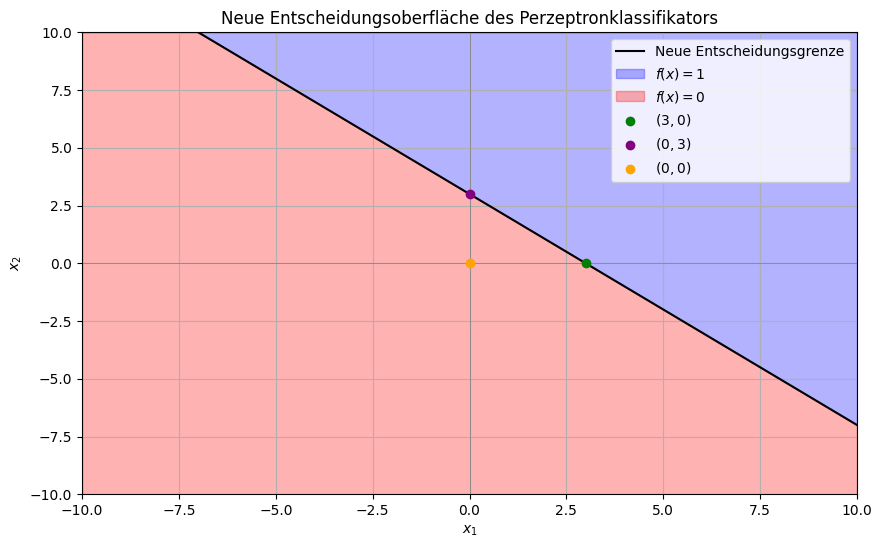

In [6]:


# Neue Parameter für den Perzeptronklassifikator
w0, w1, w2 = -3, 1, 1

# Funktion, die die neue Entscheidungsgrenze definiert
def new_decision_boundary(x1):
    return (-3 + x1) / -1

# Erzeuge die x-Werte für die neue Entscheidungsgrenze
x_values = np.linspace(-10, 10, 400)
y_values_new = new_decision_boundary(x_values)

plt.figure(figsize=(10, 6))

# Zeichne die neue Entscheidungsgrenze
plt.plot(x_values, y_values_new, label="Neue Entscheidungsgrenze", color="black")

# Markiere die Halbräume für die neue Entscheidungsgrenze
plt.fill_between(x_values, y_values_new, y2=10, alpha=0.3, color="blue", label="$f(x) = 1$")
plt.fill_between(x_values, y_values_new, y2=-10, alpha=0.3, color="red", label="$f(x) = 0$")

# Markiere wichtige Punkte
plt.scatter(3, 0, color="green", label="$(3, 0)$", zorder=5)
plt.scatter(0, 3, color="purple", label="$(0, 3)$", zorder=5)
plt.scatter(0, 0, color="orange", label="$(0, 0)$", zorder=5)

# Beschriftungen und Legende
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Neue Entscheidungsoberfläche des Perzeptronklassifikators")
plt.legend()
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

plt.show()

# Lernen von Perzeptronen
## Aufgabe 4.2


### Aufgabe 4.2 (Lernen von Perzeptronen)

Wir möchten einen Perzeptronklassifikator

\[ f(x) : \mathbb{R}^2 \rightarrow \{0, 1\}, f(x) = \alpha(w_1 x_1 + w_2 x_2 + w_0) \]

mit den Gewichten $w = [w_0, w_1, w_2]$ trainieren anhand der Datenpunkte $d^{(1)} = [1, 2]^T$, $d^{(2)} = [2, 3]^T$ und $d^{(3)} = [2, 0]^T$ mit den Klassen 1, 0 und 1.

1. **Zeichnen Sie die drei Datenpunkte in ein Koordinatensystem. Wählen Sie für Klasse 0 Datenpunkte die Farbe Rot und für Klasse 1 Datenpunkte die Farbe Blau.**

2. **Angenommen, die Gewichte sind anfangs $w = 0$, zeichnen Sie in das obige Koordinatensystem die Entscheidungsoberfläche in den gleichen Farben wie oben ein.**

3. **Führen Sie das Training schrittweise durch, bis alle Datenpunkte korrekt klassifiziert werden. Dies wird einige Iterationen dauern. Sie können sich mit einem Python-Skript behelfen. Was ist der endgültige Wert von $w$? Wieviele Iterationen wurden benötigt?**

4. **Zeichnen Sie nochmals die drei Datenpunkte in ein Koordinatensystem und zeichnen Sie die Entscheidungsoberfläche in den bekannten Farben.**

---

### Lösungsansatz

#### Schritt 1: Zeichnen der Datenpunkte

Die Datenpunkte $d^{(1)} = [1, 2]^T$, $d^{(2)} = [2, 3]^T$ und $d^{(3)} = [2, 0]^T$ werden in ein Koordinatensystem gezeichnet, wobei:
- Klasse 0 in Rot dargestellt wird.
- Klasse 1 in Blau dargestellt wird.

#### Schritt 2: Anfangsgewichte und Entscheidungsoberfläche

Die Anfangsgewichte sind $w = [0, 0, 0]$. Die Entscheidungsoberfläche ist daher die Linie $0 \cdot x_1 + 0 \cdot x_2 = 0$, was die gesamte $x_1 x_2$-Ebene umfasst. Diese wird als Trennlinie dargestellt.

#### Schritt 3: Training des Perzeptrons

Das Perzeptron wird schrittweise trainiert, indem die Gewichte angepasst werden, bis alle Datenpunkte korrekt klassifiziert werden. Wir verwenden den Perzeptron-Lernalgorithmus:

\[ w = w + \Delta w \]
\[ \Delta w = \eta (y - \hat{y}) x \]

wobei $\eta$ die Lernrate ist, $y$ die tatsächliche Klasse und $\hat{y}$ die vorhergesagte Klasse.

#### Schritt 4: Zeichnen der finalen Entscheidungsoberfläche

Nachdem das Perzeptron korrekt trainiert wurde, zeichnen wir die finale Entscheidungsoberfläche zusammen mit den Datenpunkten in das Koordinatensystem.



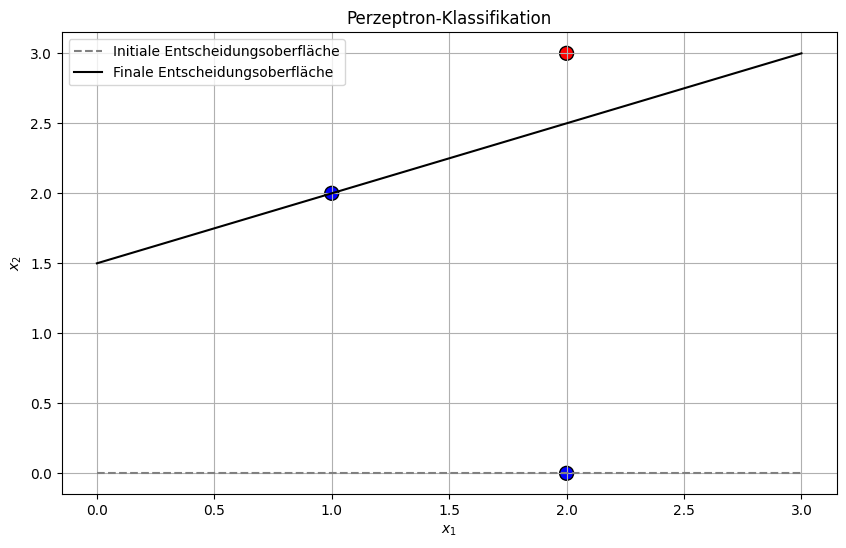

Endgültige Gewichte: [ 3.  1. -2.]


In [7]:


# Datenpunkte und Klassen
data_points = np.array([[1, 2], [2, 3], [2, 0]])
classes = np.array([1, 0, 1])

# Farben für die Klassen
colors = ['blue' if label == 1 else 'red' for label in classes]

# Zeichnen der Datenpunkte
plt.figure(figsize=(10, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=colors, s=100, edgecolors='k')

# Initiale Entscheidungsoberfläche
w = np.array([0, 0, 0])
x_values = np.linspace(0, 3, 100)
y_values = - (w[1] * x_values + w[0]) / w[2] if w[2] != 0 else np.zeros_like(x_values)
plt.plot(x_values, y_values, label='Initiale Entscheidungsoberfläche', linestyle='--', color='gray')

# Funktion zum Trainieren des Perzeptrons
def train_perceptron(data_points, classes, eta=1.0, max_iter=100):
    w = np.zeros(3)
    for _ in range(max_iter):
        error_count = 0
        for x, y in zip(data_points, classes):
            x_aug = np.insert(x, 0, 1)  # Augmentierte Eingabe
            y_pred = np.dot(w, x_aug) >= 0
            error = y - y_pred
            if error != 0:
                w += eta * error * x_aug
                error_count += 1
        if error_count == 0:
            break
    return w

# Trainieren des Perzeptrons
final_weights = train_perceptron(data_points, classes)

# Finales Zeichnen der Entscheidungsoberfläche
y_values_final = - (final_weights[1] * x_values + final_weights[0]) / final_weights[2] if final_weights[2] != 0 else np.zeros_like(x_values)
plt.plot(x_values, y_values_final, label='Finale Entscheidungsoberfläche', color='black')

# Beschriftungen und Legende
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Perzeptron-Klassifikation')
plt.legend()
plt.grid(True)
plt.show()

# Endgültige Gewichte und Anzahl der Iterationen
print("Endgültige Gewichte:", final_weights)

## Musterlösung

In [2]:
def perceptron_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    t = w[0] + x1 * w[1] + x2 * w[2]
    return 1.0 if t > 0.0 else 0.0
    
def perceptron_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plot.figure()
    plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])
    
def perceptron_learn_step(x1, x2, y, w):
    """
    perform a full perceptron learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly and return the new weights
    """
    wp = w[:]
    for x1_i, x2_i, y_i in zip(x1, x2, y):
        prediction = perceptron_classify(x1_i, x2_i, w)
        
        correction = y_i - prediction
        
        wp[0] = wp[0] + correction * 1.0
        wp[1] = wp[1] + correction * x1_i
        wp[2] = wp[2] + correction * x2_i
        
    return wp

def perceptron_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the perceptron with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    correct = 0.0
    for x1_i, x2_i, y in zip(x1, x2, y):
        if perceptron_classify(x1_i, x2_i, w) == y:
            correct = correct + 1.0
    return correct / len(x1)

def perceptron_learn(x1, x2, y, gamma):
    """
    implementation of the perceptron learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i with accuracy threshold gamma and visualization
    every 10 iterations
    """
    rho = 0
    w = [0.0, 0.0, 0.0]
    iteration = 0
    while (rho < gamma):
        w = perceptron_learn_step(x1, x2, y, w)
        rho = perceptron_accuracy(x1, x2, y, w)
        print("iteration=", iteration, "accuracy =", rho)
        if iteration % 4 == 0:
            perceptron_visualize(x1, x2, y, w)
        iteration += 1
    return w

# Training

iteration= 0 accuracy = 0.6666666666666666
iteration= 1 accuracy = 0.6666666666666666
iteration= 2 accuracy = 0.6666666666666666
iteration= 3 accuracy = 0.6666666666666666
iteration= 4 accuracy = 0.6666666666666666
iteration= 5 accuracy = 0.3333333333333333
iteration= 6 accuracy = 0.6666666666666666
iteration= 7 accuracy = 0.6666666666666666
iteration= 8 accuracy = 0.6666666666666666
iteration= 9 accuracy = 0.6666666666666666
iteration= 10 accuracy = 0.6666666666666666
iteration= 11 accuracy = 0.6666666666666666
iteration= 12 accuracy = 0.6666666666666666


/tmp/ipykernel_107445/210455622.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])


iteration= 13 accuracy = 0.6666666666666666
iteration= 14 accuracy = 0.6666666666666666
iteration= 15 accuracy = 0.6666666666666666
iteration= 16 accuracy = 0.6666666666666666
iteration= 17 accuracy = 0.3333333333333333
iteration= 18 accuracy = 0.6666666666666666
iteration= 19 accuracy = 0.6666666666666666
iteration= 20 accuracy = 0.6666666666666666
iteration= 21 accuracy = 0.6666666666666666
iteration= 22 accuracy = 0.6666666666666666
iteration= 23 accuracy = 0.6666666666666666
iteration= 24 accuracy = 0.6666666666666666
iteration= 25 accuracy = 0.6666666666666666
iteration= 26 accuracy = 0.6666666666666666
iteration= 27 accuracy = 0.6666666666666666
iteration= 28 accuracy = 1.0


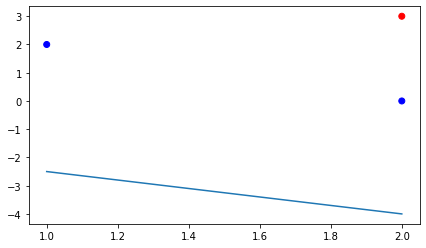

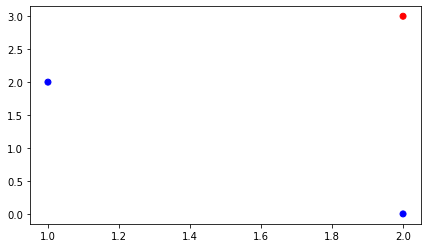

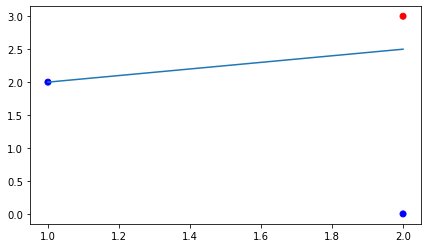

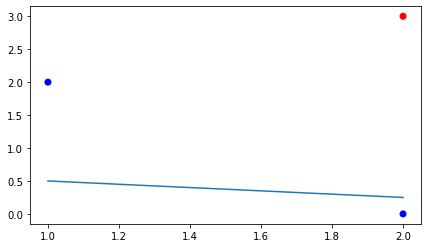

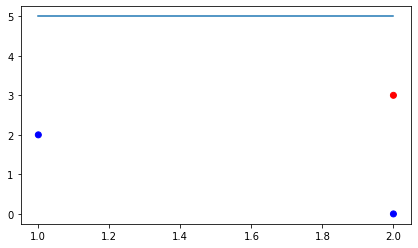

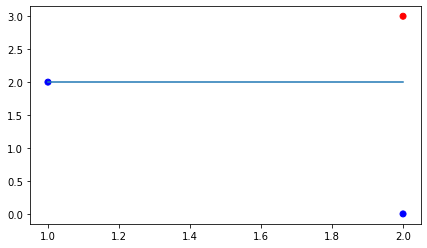

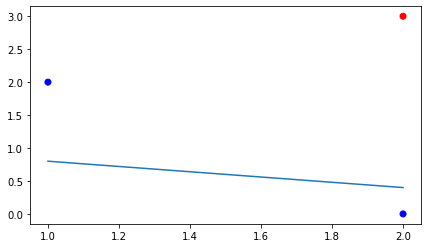

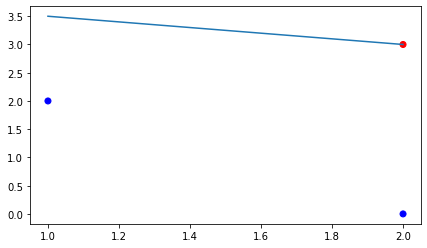

In [3]:
x1 = np.array([1, 2, 2])
x2 = np.array([2, 3, 0])
y = np.array([1, 0, 1])
w = perceptron_learn(x1, x2, y, 1.0)

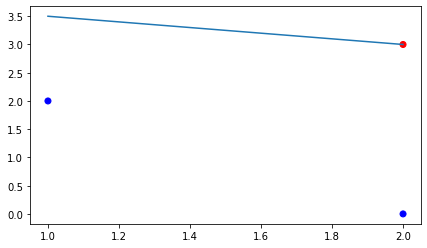

In [4]:
perceptron_visualize(x1, x2, y, w)

In [5]:
w

[8.0, -1.0, -2.0]